In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
paths = ["Pubchem_R2", "Pubchem_RMSE", "Chemberta_R2", "Chemberta_RMSE"]


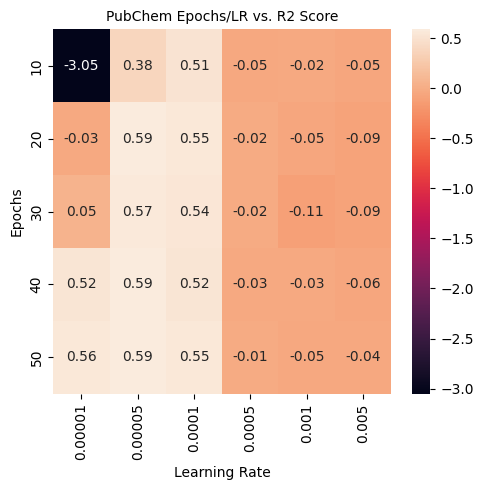

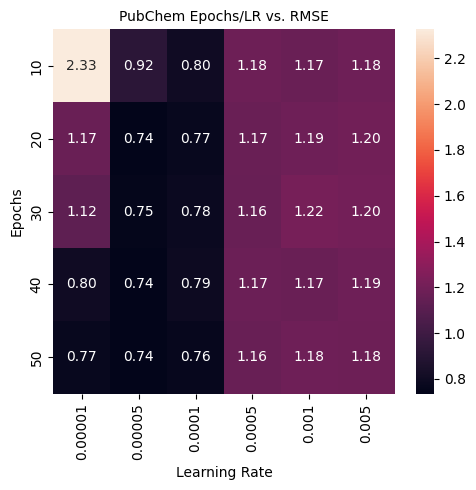

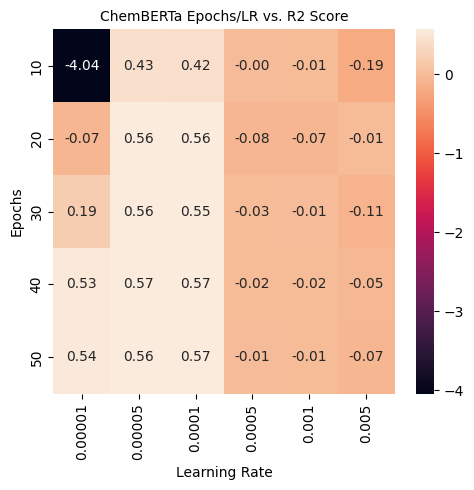

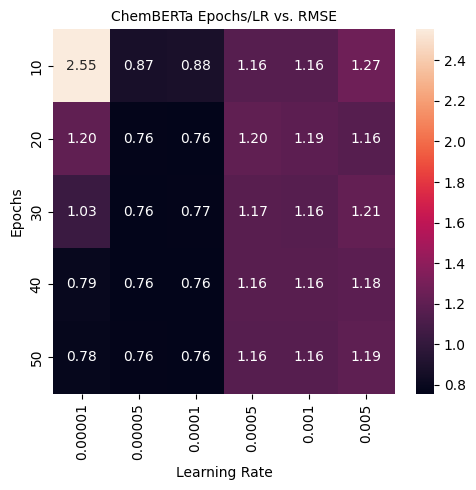

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mpl.rcParams['font.size'] = 10
plt.rcParams['svg.fonttype'] = 'none'
titles = ["PubChem Epochs/LR vs. R2 Score", "PubChem Epochs/LR vs. RMSE", "ChemBERTa Epochs/LR vs. R2 Score", "ChemBERTa Epochs/LR vs. RMSE"]
alpha = "ABCD"
for index, i in enumerate(paths):
  path = "/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Accuracy Metric Comparison - " + i + ".csv"
  data = pd.read_csv(path)
  data.head()
  fig, ax = plt.subplots(1,1,figsize=(5,5))
  sns.heatmap((data.drop(columns = ['Epochs/LR'])),annot = data.drop(columns = ['Epochs/LR']), ax = ax, fmt='.2f')
  ax.set_xlabel("Learning Rate")
  ax.set_ylabel("Epochs")
  ax.set_yticklabels([str((i + 1) * 10) for i in range(0, 5)])
  ax.set_title(titles[index], size = 10)
  plt.tight_layout()
  plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig3" + alpha[index] + ".png")

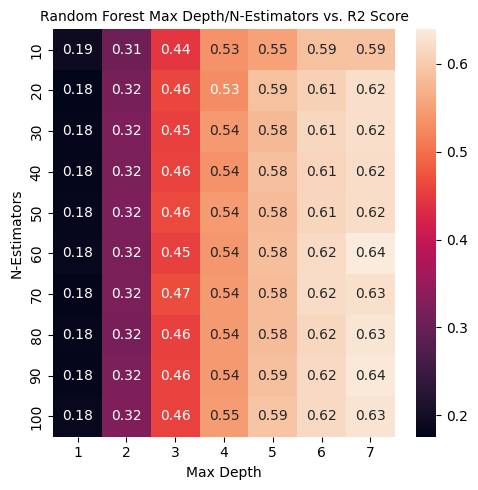

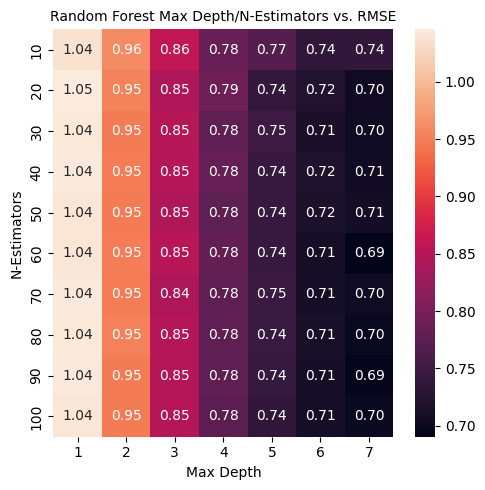

In [ ]:
paths = ["/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Accuracy Metric Comparison - " + "RandomForest_R2" + ".csv",
         "/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Accuracy Metric Comparison - " + "RandomForest_RMSE" + ".csv"]
titles = ["Random Forest Max Depth/N-Estimators vs. R2 Score", "Random Forest Max Depth/N-Estimators vs. RMSE"]
alpha = "CD"
data_indices = ["Mean r2 score", "Mean RMSE"]
for index, i in enumerate(paths):
  data = pd.read_csv(i)
  data.head()

  new_df = []

  for i in range(10):
    temp = []
    for j in range(7):
      temp.append(data[data_indices[index]][i*7 + j])
    new_df.append(temp)
  df = pd.DataFrame(data = new_df, columns = [str(i) for i in range(1, 8)], index = [str(i*10) for i in range(1, 11)])
  fig, ax = plt.subplots(1,1,figsize=(5, 5))
  sns.heatmap(df,annot = df, ax = ax, fmt='.2f')
  ax.set_xlabel("Max Depth")
  ax.set_ylabel("N-Estimators")
  ax.set_title(titles[index], size = 10)
  plt.tight_layout()
  plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig2" + alpha[index] + ".png")

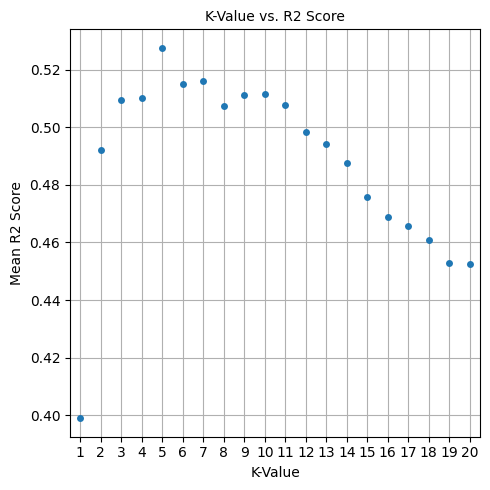

In [ ]:
path = "/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Accuracy Metric Comparison - " + "KNN_R2" + ".csv"
df = pd.read_csv(path)
fig, ax = plt.subplots(1,1,figsize=(5, 5))
sns.stripplot(data = df, x = 'K value', y = 'Mean r2 score', dodge = True, ax = ax)
ax.grid()
ax.set_xlabel("K-Value")
ax.set_ylabel("Mean R2 Score")
ax.set_title("K-Value vs. R2 Score", size = 10)
plt.tight_layout()
plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig2" + "A" + ".png")

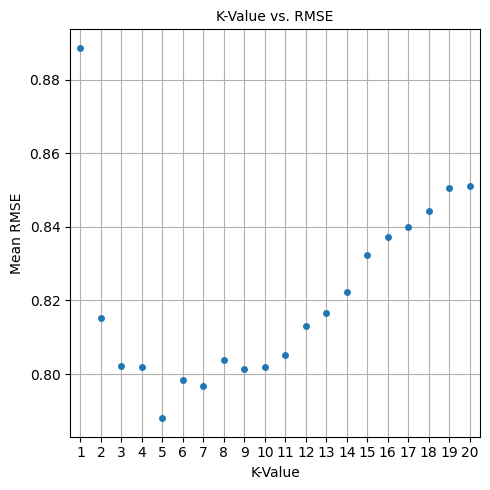

In [ ]:
path = "/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Accuracy Metric Comparison - " + "KNN_RMSE" + ".csv"
df = pd.read_csv(path)
fig, ax = plt.subplots(1,1,figsize=(5, 5))
sns.stripplot(data = df, x = 'K value', y = 'Mean RMSE', dodge = True, ax = ax)
ax.grid()
ax.set_xlabel("K-Value")
ax.set_ylabel("Mean RMSE")
ax.set_title("K-Value vs. RMSE", size = 10)
plt.tight_layout()
plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig2" + "B" + ".png")

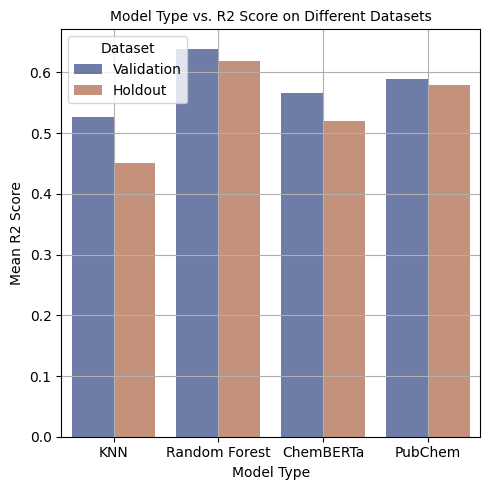

In [4]:
data = [['KNN', 0.527, 0.787, 'Validation'], ['KNN', 0.45, 0.83, 'Holdout'],
        ['Random Forest', 0.639, 0.69, 'Validation'], ['Random Forest', 0.619, 0.69, 'Holdout'],
        ['ChemBERTa', 0.566, 0.758, 'Validation'], ['ChemBERTa', 0.52, 0.804, 'Holdout'],
        ['PubChem', 0.589, 0.735, 'Validation'], ['PubChem', 0.58, 0.75, 'Holdout']]
df = pd.DataFrame(data=data, columns = ['Model', 'R2 Score', 'RMSE', 'Dataset'])
fig, ax = plt.subplots(1,1,figsize=(5, 5))
sns.barplot(
    data=df,
    x="Model", y="R2 Score", hue="Dataset",
    errorbar="sd", palette="dark", alpha=.6, ax=ax)
ax.grid()
ax.set_xlabel("Model Type")
ax.set_ylabel("Mean R2 Score")
ax.set_title("Model Type vs. R2 Score on Different Datasets", size = 10)
plt.tight_layout()
plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig4" + "A" + ".png")

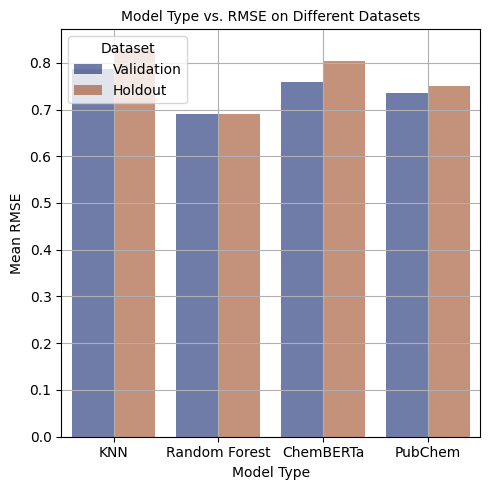

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
sns.barplot(
    data=df,
    x="Model", y="RMSE", hue="Dataset",
    errorbar="sd", palette="dark", alpha=.6, ax=ax)
ax.grid()
ax.set_xlabel("Model Type")
ax.set_ylabel("Mean RMSE")
ax.set_title("Model Type vs. RMSE on Different Datasets", size = 10)
plt.tight_layout()
plt.savefig("/content/drive/Shareddrives/1:1_Aiden_Chavda/Results/Fig4" + "B" + ".png")